In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset import XinguDataset


In [2]:
ds_no_aug = XinguDataset('selected_patches/train/images/', 'selected_patches/train/masks/', [4, 6, 7], 256, 256)
ds_aug = XinguDataset('selected_patches/train/images/', 'selected_patches/train/masks/', [4, 6, 7], 256, 256, True)

In [3]:
print(f'ds_no_aug: {len(ds_no_aug)} samples')
print(f'ds_aug: {len(ds_aug)} samples')

ds_no_aug: 996 samples
ds_aug: 7968 samples


In [6]:
image, mask = ds_aug.__getitem__(15)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


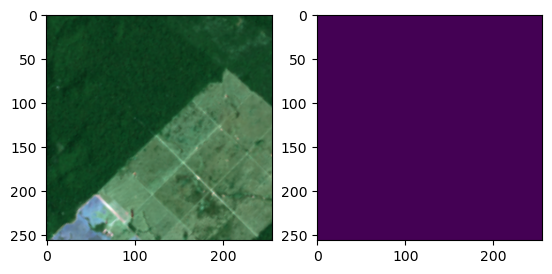

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

In [18]:
image, mask = ds_no_aug.__getitem__(90)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


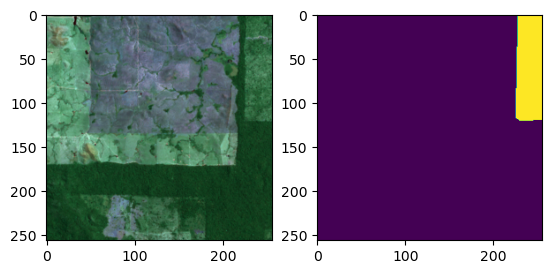

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())